## Assessment Machine Learning and Statistics, Winter 2023/24

### Lecturer: ian.mcloughlin@atu.ie

### Notebook author:Jarlath Scarry


### Project breif

• The project is to create a notebook exploring classification algrithms applied on the iris flower data set associated with Ronald A Fisher.5
• In your notebook, you should first explain what supervised learing is and then explain what classification algorithms are.
• Describe at least one common classification algorithm and implment it using the scikit-learn Python library.
• Throughout your notebook, use appropriate plots, mathematical
notation, and diagrams to explain the relevant concepts.

### Introduction

In this notebook we breifly explain what classification algorithms are, what machine leatning is and we will go through some common clasification algorithms and implement them. The goal is to help the reader understand the process involved in selecting and implementing a machine learning classification algorithm on a given dataset.


Proposed steps:

The Proposed steps in the project are outlined below:

Data Acquisition:  Load the iris dataset from a reliable source.

Exploratory data analysis: Some basic probing of the data to understand the scope of the dataset.

Pre-processing of the data:  Survey the data and clean it if required.

Feature selection: Identify some features in the data that we might leverage in our classification setp.

Build Machine learning Program: We will use some pre prepared algorithms from python libraries in our ML program

Train the ML model: Seperate our data and use some of it to training or fine tune our model to work well on our specific data set.

Test the model: We will ues the remainder of our data to then test our model.

Results Calculation and Evaluation:  We can measure the performance of our model against the data to help evaluate performance.

Conclusion


### What is the Iris Data set?

The Fisher’s Iris Data set is a data set introduced by the British Biologist and Statistician Ronald Fisher in his now classic 1936 paper “The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis”. It is sometimes known as the Anderson’s Iris data set because the data was collected by Edgar Anderson, who collected the majority of the data in the Gaspé Peninsula, in North Eastern Canada.
 It is a multivariate data set, meaning it has a number of mathematical or statistical variables. The data set consists of 50 samples from each of three species of Iris. Four features were measured from each sample, so a total of 150 instances with five attributes which are detailed below.
Attributes: 
1.	Sepal length in cm
2.	Sepal width in cm
3.	Petal length in cm
4.	Petal width in cm
5.	Class / Species:   o	Iris Setosa   o	Iris Versicolor   o	Iris Virginica

The Iris data set is often used when studying data because the data and many related resources are readily available to us. The data is open source and its accuracy and its source are known, It is relatively small in size, It is divided into 3 classes and It is easily visualised. Additionally Ronald Fisher was a very prominent figures in statistics. All these factors mean it has become very popular in data science.  

One flower species is linearly separable from the other two, but the other two are not linearly separable from each other. https://www.kaggle.com/uciml/iris

Much of the information about the dataset in this section is collected from the following locations:

Wikipedia - Iris flower data set https://en.wikipedia.org/wiki/Iris_flower_data_set
UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/iris
About Fisher’s Iris dataset https://www.angela1c.com/projects/iris_project/the-iris-dataset/
The Mighty Iris Dataset https://braintoy.ai/2021/04/19/mighty-iris-dataset/

### What is Machine learning?








In [15]:
#some initial imports
import numpy as np # Numerical arrays.
import matplotlib.pyplot as plt # Plotting.
%matplotlib inline
import scipy.stats as ss # Statistics.
import pandas as pd
from datetime import date
import seaborn as sns

# import models from Scikit-learn [B]
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# import model evaluation tools 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
#from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')


### Data Acquisition: Load the iris dataset

The `iris.csv` is loaded from the local directory. It was provided as part of the description of this project. 

### Exploratory data analysis

Some basic probing of the data to understand the scope of the dataset. We check the categories, length, number of datapoints and the quality by searching for missing data. Any and all these factors may affert our choice of classification algorithms for our model.

In [2]:
iris = pd.read_csv(r"iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.isnull().values.any()

False

In [5]:
iris.shape

(150, 5)

In [6]:
iris.value_counts("class")

class
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Pre-processing of the data

The data is quite short with just 150 line entries but no null (or `NaN`) values. This is good, because we don't need to worry about our results being skewed by empty cells.From the shape we see that we have 150x5 datapoints, so a total of 750 points. We can see column headings from the data `head()` output. Varieties are under the heading `class`. The other feature headings can also be seen. We will need these too. For now The data looks good with no pre processing required. 

If we had empty cells we might need to remove the assosiated date or look at some technique to fill in the blanks based on related date. There are a number of was to do this such as the `fillna()` method. This iterates through the dataframe and fills empty rows with a specified value. This could be based on values such as mean, median or other values. Another reason to pre-process would be if the results have order bias. The order that the data is exposed to a machine learning model affects its internal decisions. Shuffling before learning will help prevent the model overfitting to a specific pattern or patterns in the training data. For e

https://elitedatascience.com/wp-content/uploads/2017/09/Overfitting-Data-Points.png

https://elitedatascience.com/overfitting-in-machine-learning#:~:text=If%20our%20model%20does%20much,accuracy%20on%20the%20test%20set. Overfitting in Machine Learning: What It Is and How to Prevent It JULY 6, 2022



### Feature Selection

Feature selection is a key step in classification with some larger datasets. I idea is to select the best attributes to test by correlation-based feature selection (CFS), That is corrolation of the feature to the flower species (target). We can then evaluate based on their degree of positive or negative corrolation. The aim is to reduce the number of input variables by removing those that are precieved to have little corrolation to the flower species. 
The aim is to reduce the number of input variables by removing those that are precieved to have little corrolation to the species. In simple terms, if we put alot of rubbish into out algorithms we will get rubbish out. Apart from choosing the right model for our data, we need to choose the right data to put in our model.  [16] 

Checking for corrolation between variables and visualising using Seaborn .corr method. This is easier to view in the form of a heat map, with high corrolation showing in Red. 

In [10]:

d = {'setosa' :0, 'versicolor':1 ,'virginica':2}
iris['class'] = iris['class'].map(d)

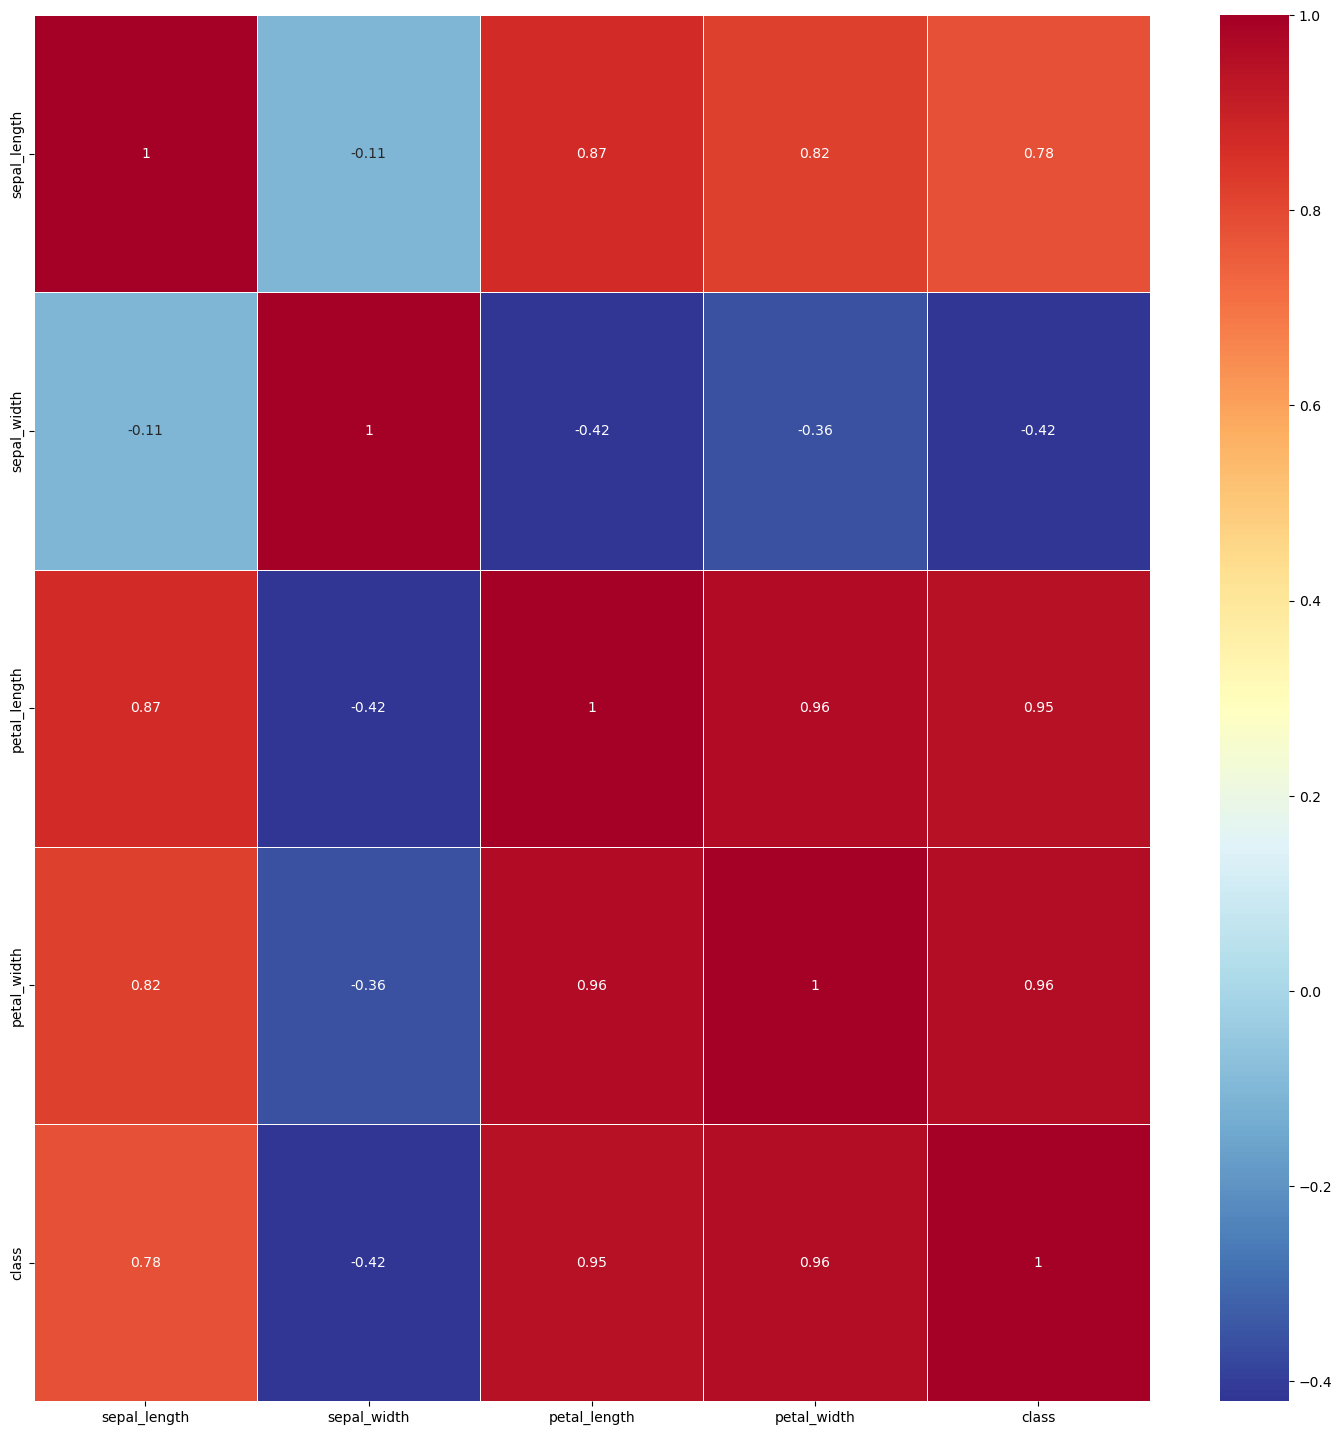

In [12]:
import seaborn as sns
corr = iris.corr()
fig, ax = plt.subplots(figsize=(18,18))   
ax = sns.heatmap(corr,xticklabels=corr.columns,
           yticklabels=corr.columns, 
           cmap="RdYlBu_r", annot=True,linewidth=0.5,)
            #select heat map colours and reverse, so red is for hot.

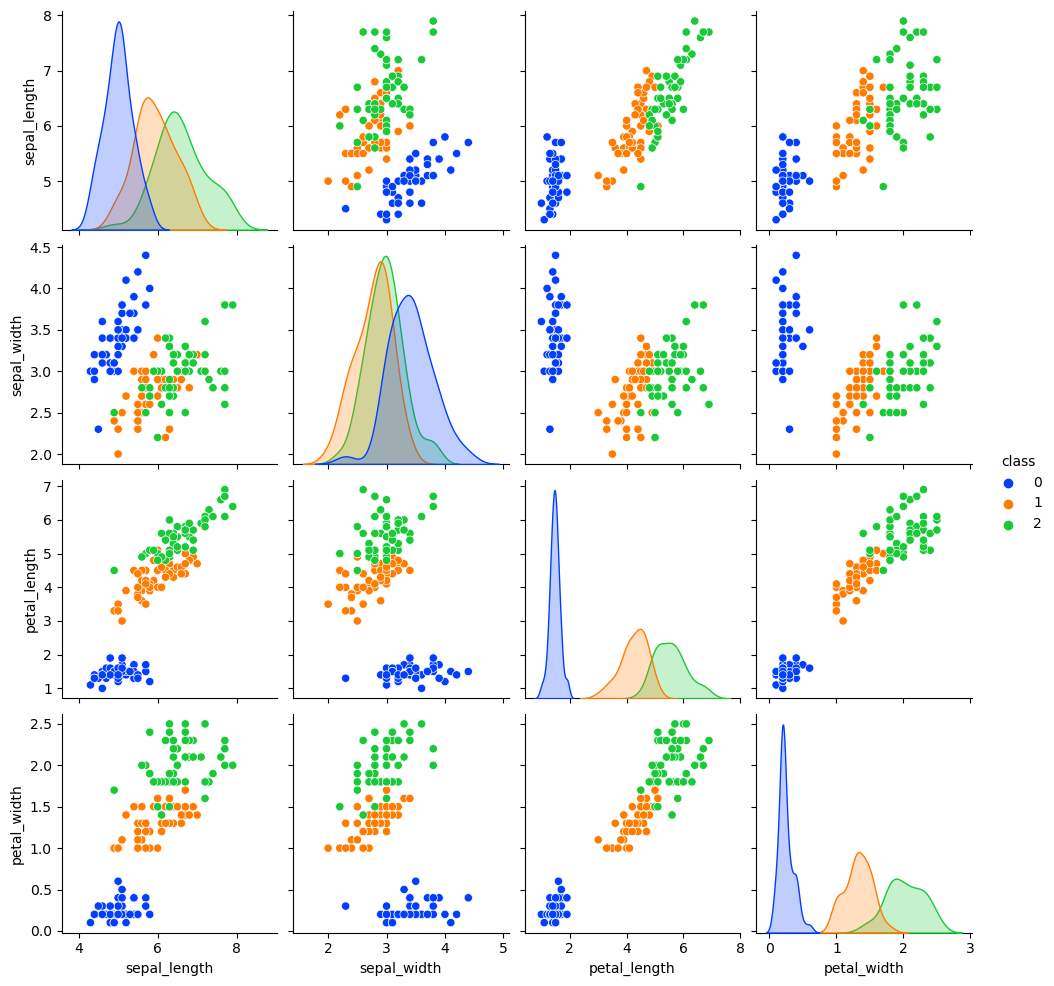

In [16]:
#scatterplot matrix of mean colums
import seaborn as sns
iris_mean = iris[iris.columns]
sns.pairplot(data=iris_mean, hue='class', palette='bright')

### Splitting the data for training


To carryout a split train and learn on the data we need separate out the target variable. In this case we are looking to predict class, so we seperate it out as y. The feature data we are using to predict the class is seperated to the variable X. After that we will split the dataset out into training (70%) and testing (30%) sets using the `train_test_split()` function from sikit-learn

In [ ]:
# Separate out the target variable. In this case we are looking to predict class, so we seperate it out as y. 
# The feature data we are using to predict the class is seperated to the variable X. 
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['class']

### References

[16] (Everything You Need to Know About Feature Selection In Machine Learning, Kartik Menon, 15 Nov 2022) Retrieved from:https://www.simplilearn.com/tutorials/machine-learning-tutorial/feature-selection-in-machine-learning#why_feature_selection

https://towardsdatascience.com/classification-basics-walk-through-with-the-iris-data-set-d46b0331bf82